In [1]:
import time
import itertools
import numpy as np

import qiskit
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B, SPSA
from qiskit.opflow.state_fns import StateFn, CircuitStateFn
from qiskit.providers.aer import StatevectorSimulator, AerSimulator

from qiskit.opflow import CircuitSampler

from qiskit.ignis.mitigation.measurement import CompleteMeasFitter # you will need to pip install qiskit-ignis
from qiskit.ignis.mitigation.measurement import complete_meas_cal

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
cmap = plt.get_cmap("plasma") #'viridis'

from modules.utils import *

from qae import *

import datetime

In [2]:
print(qiskit.__version__, np.__version__)

0.17.4 1.20.1


In [89]:
IBMQ.load_account() # this then automatically loads your saved account
provider = IBMQ.get_provider(hub='ibm-q-research')

ibmqfactory.load_account:WARNING:2021-06-09 13:36:16,950: Credentials are already in use. The existing account in the session will be replaced.


In [90]:
device = provider.backend.ibmq_jakarta # 6 bogota ; 4 rome

In [91]:
### Real device execution:
backend_device = device 

### Simulation with noise profile from real device
backend_sim = qiskit.providers.aer.AerSimulator.from_backend(device)

### Simulation without noise
#backend = qiskit.providers.aer.AerSimulator()

In [133]:
### Preliminaries
L = 5
num_trash = 2
anti = -1 # 1 for ferromagnetic Ising model, -1 for antiferromagnet

run_VQE = True # whether or not you want to compute the VQE values; or load them
execute = True
real_device = True    # want to execute on real device

# dataset to be loaded (optimal VQE parameters)
# if execute_VQE is True this will overwrite the file
filename = f'data/jakarta_execute'

# Give a _unique_ name to this notebook execution, the results will be stored in the appropriate files with that name
name = "jakarta_execute" 

# VQE parameters
classical optimization of the VQE parameters

In [93]:
# uncomment in case you want to toy around with the ansatz circuit
rotation_blocks = "ry"
entanglement_blocks = "cz" # cx
entanglement = "sca" #"sca"
reps = 1

ansatz_config = dict(rotation_blocks = rotation_blocks, entanglement_blocks = entanglement_blocks, reps = reps, entanglement = entanglement)

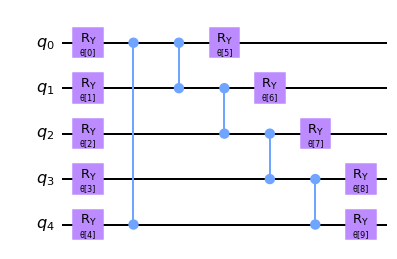

In [94]:
ansatz = qiskit.circuit.library.TwoLocal(L, **ansatz_config)
ansatz.draw("mpl")

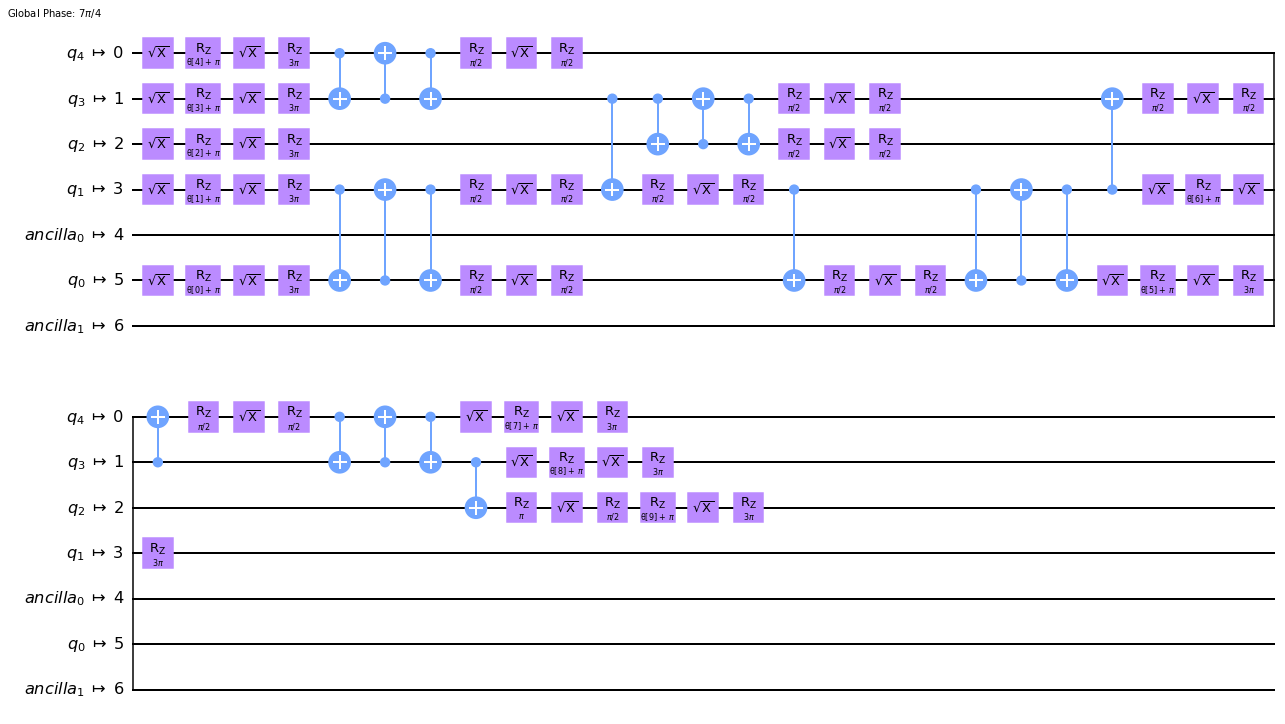

In [95]:
tansatz = qiskit.transpile(ansatz, backend_sim)
tansatz.draw("mpl")

In [96]:
coupling_map = device.configuration().coupling_map
noise_model = qiskit.providers.aer.noise.NoiseModel.from_backend(device)
basis_gates = noise_model.basis_gates

In [97]:
qi_device = qiskit.utils.QuantumInstance(backend=backend_device, # , seed_simulator=seed, seed_transpiler=seed
                                  shots = 1000,
                                  coupling_map=coupling_map,
                                  #noise_model=noise_model, # comment out on real device execution
                                  measurement_error_mitigation_cls= CompleteMeasFitter, 
                                  cals_matrix_refresh_period=30  #How often to refresh the calibration matrix in measurement mitigation. in minutes
                                 )

qi_sim = qiskit.utils.QuantumInstance(backend=backend_sim, # , seed_simulator=seed, seed_transpiler=seed
                                  shots = 1000,
                                  coupling_map=coupling_map,
                                  noise_model=noise_model, # comment out on real device execution
                                  measurement_error_mitigation_cls= CompleteMeasFitter, 
                                  cals_matrix_refresh_period=30  #How often to refresh the calibration matrix in measurement mitigation. in minutes
                                 )

In [98]:
if not real_device:
    backend_device = backend_sim 
    qi_device = qi_sim

ED energy: -4.001174951447172 ;; VQE energy: -3.7405398149722315 ;; diff 0.26063513647494085
ED mag: (0.99997251805197+0j) ;; VQE mag: -0.9450746937324803 ;; diff (-1.9450472117844502+0j)
1 / 10, gx = 0.01, gz = 0.00, time : 0:02:00.314610


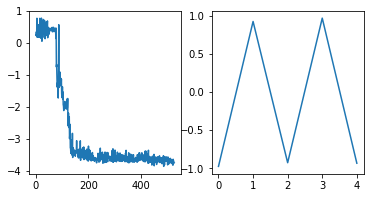

ED energy: -4.002354658940128 ;; VQE energy: -3.4744837759019638 ;; diff 0.527870883038164
ED mag: (0.9997871168456927+0j) ;; VQE mag: -0.9040680735295219 ;; diff (-1.9038551903752146+0j)
2 / 10, gx = 0.03, gz = 0.00, time : 0:00:49.928791


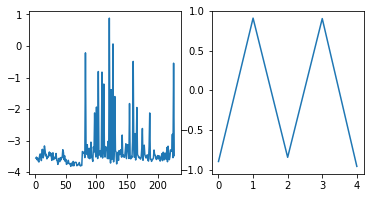

/home/kkottmann/anaconda3/envs/qiskit_env/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ED energy: -4.011493041884014 ;; VQE energy: -3.7351668060045764 ;; diff 0.27632623587943783
ED mag: (0.9983418416034734+0j) ;; VQE mag: -0.9417714888505074 ;; diff (-1.9401133304539808+0j)
3 / 10, gx = 0.08, gz = 0.00, time : 0:00:47.795116


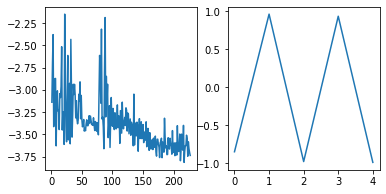

/home/kkottmann/anaconda3/envs/qiskit_env/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ED energy: -4.082606974901647 ;; VQE energy: -3.613435131525569 ;; diff 0.46917184337607765
ED mag: (0.8987992837193618+0j) ;; VQE mag: -0.893349896358448 ;; diff (-1.7921491800778098+0j)
4 / 10, gx = 0.22, gz = 0.00, time : 0:00:48.011116


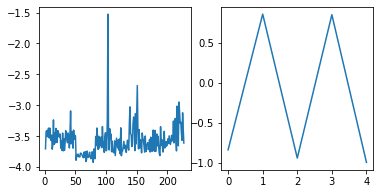

/home/kkottmann/anaconda3/envs/qiskit_env/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ED energy: -4.694765021995828 ;; VQE energy: -4.178501161311296 ;; diff 0.516263860684532
ED mag: (0.014151378615280152+0j) ;; VQE mag: -0.8717370559905351 ;; diff (-0.8858884346058152+0j)
5 / 10, gx = 0.60, gz = 0.00, time : 0:00:49.968767


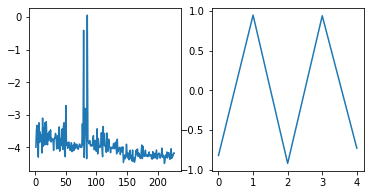

/home/kkottmann/anaconda3/envs/qiskit_env/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ED energy: -8.946610734699343 ;; VQE energy: -8.057205533867158 ;; diff 0.8894052008321847
ED mag: (0.00032044361707472824+0j) ;; VQE mag: -0.1783366837012838 ;; diff (-0.17865712731835853+0j)
6 / 10, gx = 1.67, gz = 0.00, time : 0:00:51.567997


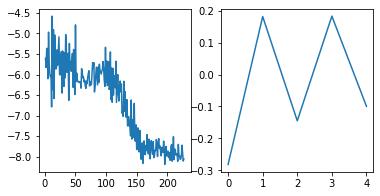

/home/kkottmann/anaconda3/envs/qiskit_env/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ED energy: -23.423699456262888 ;; VQE energy: -21.99156462823243 ;; diff 1.4321348280304562
ED mag: (5.5878435511094726e-05+0j) ;; VQE mag: 0.02417378580718943 ;; diff (0.024117907371678335+0j)
7 / 10, gx = 4.64, gz = 0.00, time : 0:01:00.191594


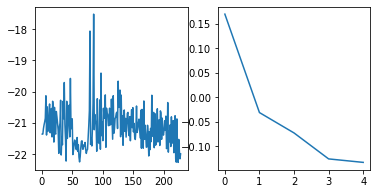

/home/kkottmann/anaconda3/envs/qiskit_env/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ED energy: -64.65492504178603 ;; VQE energy: -60.011261079329635 ;; diff 4.643663962456394
ED mag: (1.682269291734817e-05+0j) ;; VQE mag: -0.015235257970610918 ;; diff (-0.015252080663528267+0j)
8 / 10, gx = 12.92, gz = 0.00, time : 0:00:51.778070


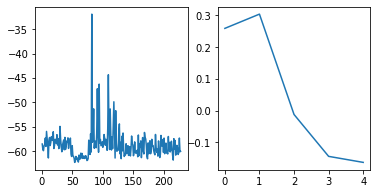

/home/kkottmann/anaconda3/envs/qiskit_env/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ED energy: -179.7185115530941 ;; VQE energy: -171.8074706197575 ;; diff 7.911040933336579
ED mag: (5.72606645299345e-06+0j) ;; VQE mag: 0.055878365817625994 ;; diff (0.055872639751173+0j)
9 / 10, gx = 35.94, gz = 0.00, time : 0:00:47.964171


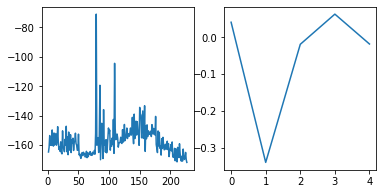

/home/kkottmann/anaconda3/envs/qiskit_env/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ED energy: -500.0100000362506 ;; VQE energy: -482.8156504806308 ;; diff 17.194349555619795
ED mag: (2.0202777822192486e-06+0j) ;; VQE mag: 0.02049830645180149 ;; diff (0.02049628617401927+0j)
10 / 10, gx = 100.00, gz = 0.00, time : 0:00:51.834622


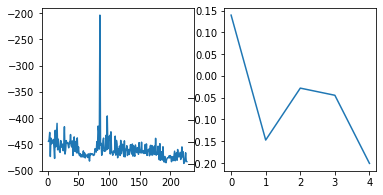

/home/kkottmann/anaconda3/envs/qiskit_env/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [61]:
if run_VQE:
    maxiter = [200,200,200,200,200,
               200,200,200,150,150,
               150,150,100,100,100,
               60,30,30,30,30
              ]
    maxiter = maxiter[::2]
    maxiter = [150] + [50] * 9
    logspace_size = len(maxiter)
    gx_vals = np.logspace(-2,2,logspace_size)
    #gz_vals = [0.] # np.logspace(-2,2,logspace_size)

    counts = []
    values = []
    params = []

    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)
        params.append(parameters)

    opt_params = []
    gx_list = []
    gz_list = []
    countss, valuess, paramss = [], [], []
    Qmag_sim, QZ_sim, Qen_sim= [],[], []
    Smag, Sen = [], []

    #maxiter = [200,200,200,200, 150, 60, 60, 60, 60, 60]
    for j,gx in enumerate(gx_vals):
        gz = 0
        t0 = datetime.datetime.now()
        counts = []
        values = []
        params = []

        optimizer = SPSA(maxiter=maxiter[j], blocking=True) # ,learning_rate=0.05, perturbation=0.05,; setting that speeds things up sometimes

        vqe = qiskit.algorithms.VQE(ansatz=ansatz,
                                    initial_point = opt_params[j-1] if j != 0 else None,
                                    optimizer=optimizer,
                                    callback=store_intermediate_result, # comment out on real device
                                    quantum_instance=qi_sim
                                   )

        H = QHIsing(L,anti,np.float32(gx),np.float32(gz))
        result = vqe.compute_minimum_eigenvalue(H, aux_operators = [QNKron(L,Z,I,i) for i in range(L)]) #ED with Qiskit VQE
        Qen_sim.append(result.eigenvalue)
        QZ_sim.append(result.aux_operator_eigenvalues[:,0]) # real-space resolved Z expectation value
        Qmag_sim.append(np.mean(anti**np.arange(L) * result.aux_operator_eigenvalues[:,0]))
        countss.append(counts)
        valuess.append(values)
        paramss.append(params)

        # uncomment if you want to recompute ED results (typically provided with guess parameters)
        ED_state, ED_E, ham = ising_groundstate(L, anti, np.float32(gx), np.float32(gz))
        Sen.append(ED_E)
        Smag.append(ED_state.T.conj()@Mag(L,anti)@ED_state)

        print(f"ED energy: {Sen[j]} ;; VQE energy: {Qen_sim[j]} ;; diff {Qen_sim[j] - Sen[j]}")
        print(f"ED mag: {Smag[j]} ;; VQE mag: {Qmag_sim[j]} ;; diff {Qmag_sim[j] - Smag[j]}")


        gx_list.append(gx)
        gz_list.append(gz)
        opt_params.append(sort_params(result.optimal_parameters))
        print(f"{j+1} / {len(gx_vals)}, gx = {gx:.2f}, gz = {gz:.2f}, time : {(datetime.datetime.now() - t0)}")
        fig, axs = plt.subplots(ncols=2,figsize=(6,3))
        axs[0].plot(countss[j],valuess[j])
        axs[1].plot(result.aux_operator_eigenvalues[:,0])
        plt.show()
        np.savez(filename, gx_list=gx_list, gz_list=gz_list, opt_params=opt_params,
                 Qmag_sim=Qmag_sim, Qen_sim=Qen_sim, QZ_sim = QZ_sim, Sen=Sen, Smag=Smag,
                 ansatz_config=ansatz_config,
                 paramss = paramss, valuess = valuess, countss = countss
                )

In [62]:
temp = np.load(filename + ".npz",allow_pickle=True)
gx_list = temp["gx_list"]
gz = 0
gz_list = [0]
Qmag_sim = temp["Qmag_sim"]
QZ_sim = temp["QZ_sim"]
Qen_sim = temp["Qen_sim"]
Sen = temp["Sen"]
Smag = temp["Smag"]
opt_params = temp["opt_params"]
paramss = temp["paramss"]; valuess = temp["valuess"]; countss = temp["countss"]

/home/kkottmann/anaconda3/envs/qiskit_env/lib/python3.9/site-packages/qiskit/utils/run_circuits.py:382: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj, **backend_options, **noise_config)


1 / 10, QZ: (-0.8722281425743357+0j), gx = 0.01, gz = 0.00, time : 0:13:02.475752


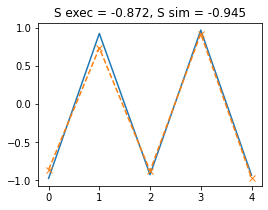

2 / 10, QZ: (-0.8678501985805144+0j), gx = 0.03, gz = 0.00, time : 0:05:35.041412


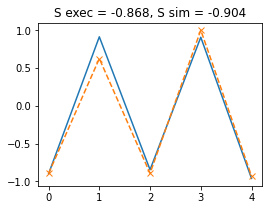

3 / 10, QZ: (-0.8909799807612633+0j), gx = 0.08, gz = 0.00, time : 0:03:01.999854


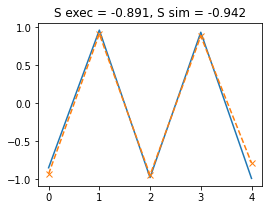

4 / 10, QZ: (-0.8739203378451148+0j), gx = 0.22, gz = 0.00, time : 0:03:11.994453


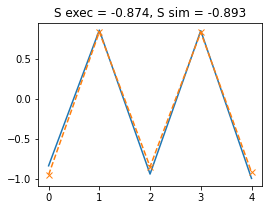

5 / 10, QZ: (-0.8847628313904038+0j), gx = 0.60, gz = 0.00, time : 0:03:24.245002


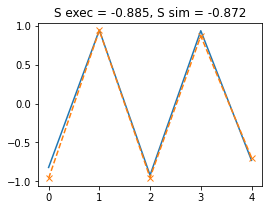

6 / 10, QZ: (-0.22758743528019273+0j), gx = 1.67, gz = 0.00, time : 0:05:42.530592


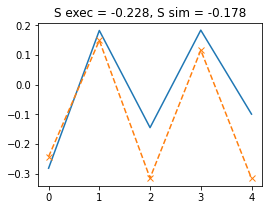

7 / 10, QZ: (-0.009897803416777862+0j), gx = 4.64, gz = 0.00, time : 0:03:14.118816


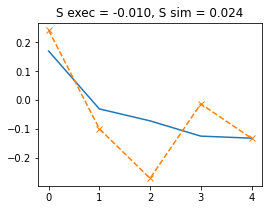

8 / 10, QZ: (-0.06302067207352596+0j), gx = 12.92, gz = 0.00, time : 0:04:06.904556


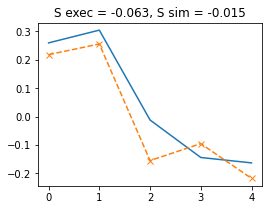

9 / 10, QZ: (0.02898499187644952+0j), gx = 35.94, gz = 0.00, time : 0:08:32.225371


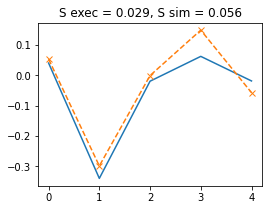

10 / 10, QZ: (0.031415287214321894+0j), gx = 100.00, gz = 0.00, time : 0:04:05.595339


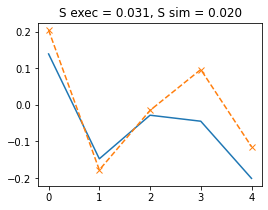

In [99]:
# This just recomputes the magnetization with the parameters provided by guess_params
if execute:
    QZ_executed=np.zeros((len(opt_params),L), dtype="complex")
    Qmag_executed=np.zeros((len(opt_params),), dtype="complex")
    for j in range(len(opt_params)):
        t0 = datetime.datetime.now()
        gx = gx_list[j]
        #H = QHIsing(L, anti, np.float32(gx), np.float32(gz)) # build Hamiltonian Op
        state = ansatz.assign_parameters(opt_params[j])
        for i in range(L):
            meas_outcome = ~StateFn(QNKron(L,Z,I,i)) @ StateFn(state)
            QZ_executed[j,i] = CircuitSampler(qi_device).convert(meas_outcome).eval() #https://quantumcomputing.stackexchange.com/questions/12080/evaluating-expectation-values-of-operators-in-qiskit
        Qmag_executed[j] = np.mean(anti**np.arange(L) * QZ_executed[j])
        #e_outcome = ~StateFn(H) @ StateFn(state)
        #Qen_executed[j] = CircuitSampler(qi).convert(e_outcome).eval()
        print(f"{j+1} / {len(opt_params)}, QZ: {Qmag_executed[j]}, gx = {gx:.2f}, gz = {gz:.2f}, time : {(datetime.datetime.now() - t0)}")
        fig, ax = plt.subplots(ncols=1,figsize=(4,3))
        ax.plot(QZ_sim[j].real)
        ax.plot(QZ_executed[j].real,"x--")
        ax.set_title("S exec = {:.3f}, S sim = {:.3f}".format(Qmag_executed[j].real, Qmag_sim[j].real))
        plt.show()

In [100]:
np.savez(filename + f"_executed_-real-device-{real_device}", gx_list=gx_list, gz_list=gz_list, opt_params=opt_params,
         Qmag_sim=Qmag_sim, Qen_sim=Qen_sim, QZ_sim = QZ_sim, Sen=Sen, Smag=Smag,
         Qmag_device= Qmag_executed, QZ_device = QZ_executed,
         ansatz_config=ansatz_config,
         paramss = paramss, valuess = valuess, countss = countss
        )

/home/kkottmann/anaconda3/envs/qiskit_env/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/kkottmann/anaconda3/envs/qiskit_env/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


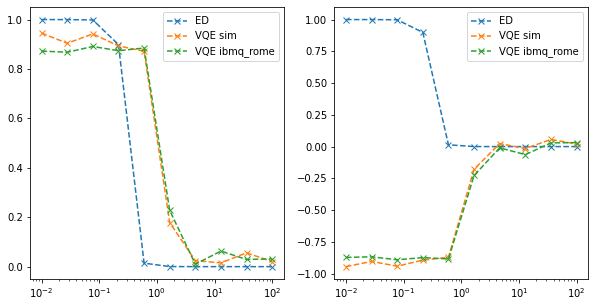

In [101]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
ax = axs[0]
ax.plot(gx_list, np.abs(Smag),"x--", label="ED")
ax.plot(gx_list, np.abs(Qmag_sim),"x--", label="VQE sim")
ax.plot(gx_list, np.abs(Qmag_executed),"x--", label="VQE ibmq_rome")
ax.set_xscale("log")
ax.legend()

ax = axs[1]
ax.plot(gx_list, Smag,"x--", label="ED")
ax.plot(gx_list, Qmag_sim,"x--", label="VQE sim")
ax.plot(gx_list, Qmag_executed,"x--", label="VQE ibmq_rome")
ax.set_xscale("log")
ax.legend()

In [66]:
##############################################################################
### II - Anomaly Detection  ##################################################
##############################################################################

In [102]:
trash_qubits_idxs = [1,3]

In [103]:
# Using our QAEAnsatz class (described in qae.py)
circ = QAEAnsatz(num_qubits = L, num_trash_qubits= num_trash, trash_qubits_idxs = trash_qubits_idxs, measure_trash=True)

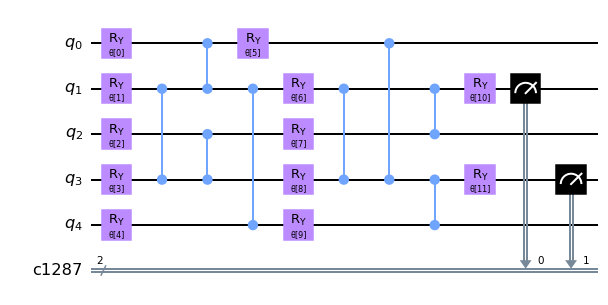

In [104]:
circ.draw("mpl")

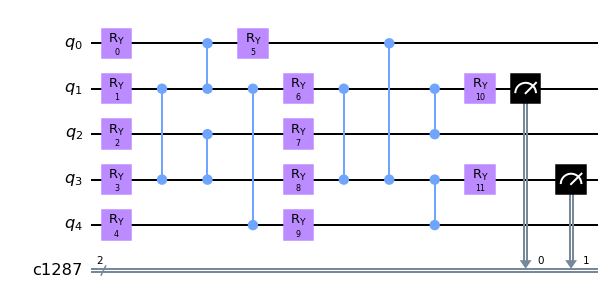

In [105]:
# an example with assigned parameters
circ = circ.assign_parameters(np.arange(L*2+2))
circ.draw("mpl")

Initialize state with VQE circuit _or_ state vector

In [106]:
def prepare_circuit(thetas, L=6, num_trash=2, init_state=None, measurement=True, vqe=True):
    QAE_circ = QAEAnsatz(num_qubits = L, num_trash_qubits= num_trash, trash_qubits_idxs = trash_qubits_idxs, measure_trash=measurement).assign_parameters(thetas)
    if vqe:
        VQE_circ = ansatz.assign_parameters(init_state)
        fullcirc = VQE_circ + QAE_circ
    else:
        fullcirc = QAE_circ.initialize(init_state, qreg)
    return fullcirc

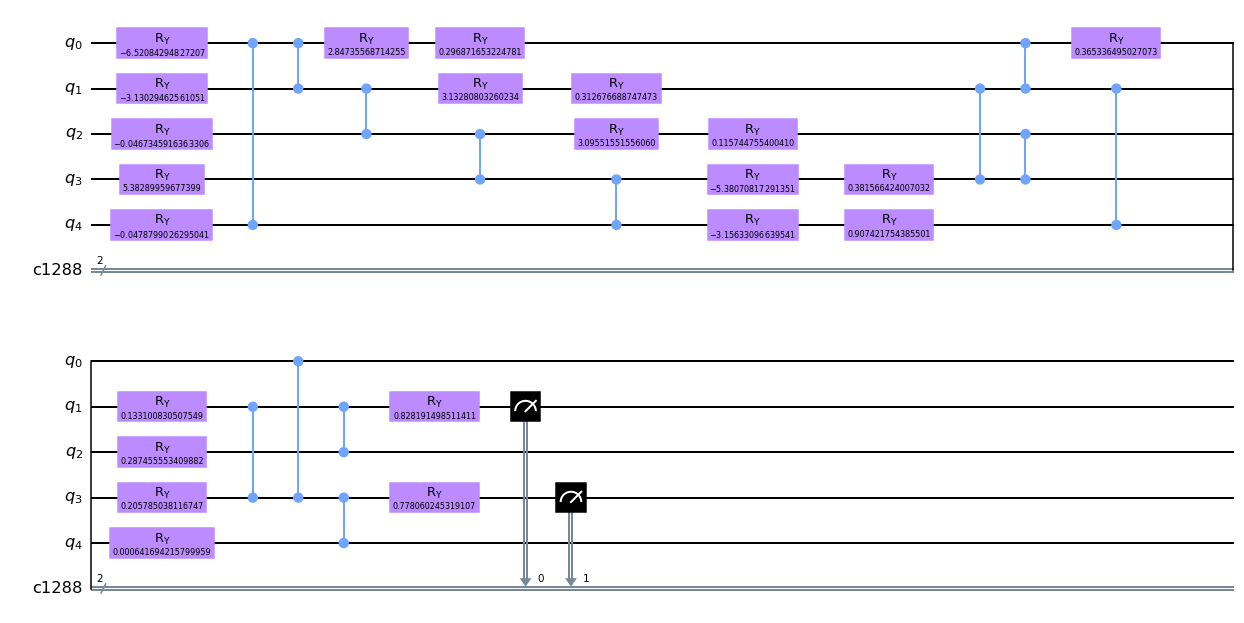

In [107]:
# example of the full circuit with random parameters assigned
fullcirc = prepare_circuit(np.random.rand(L*2+2),L,num_trash, vqe=True, init_state=opt_params[0])
fullcirc.draw("mpl")

### Execute circuit
Circuit is executed on simulator and measurement outcomes on the trash qubits are stored

In [108]:
backend = backend_device

In [111]:
def calibrate_circuit(L, nums_trash=trash_qubits_idxs,shots=1000):
    # outputs a CompleteMeasFitter object for alter use
    num_trash = len(nums_trash)
    qreg = QuantumRegister(L, 'q')
    # obtain calibration matrix
    qubit_list = [i for i in nums_trash] # only need to calibrate the trash qubits
    circlabel = f'mcal_{datetime.datetime.now()}'
    meas_calibs, state_labels = complete_meas_cal(qubit_list=qubit_list, qr=qreg, circlabel=circlabel)
    cal_job = backend.run(meas_calibs, shots=shots) #, noise_model=noise_model)
    cal_results = cal_job.result()
    meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel=circlabel)
    print(circlabel, meas_fitter.cal_matrix)
    return meas_fitter

In [112]:
def run_circuit(thetas, L, num_trash, init_state, vqe=True, shots=100, meas_fitter = None):
    circ = prepare_circuit(thetas, L, num_trash, init_state, vqe=vqe)
    tcirc = qiskit.transpile(circ, backend)
    # Execute the circuit 
    job_sim = backend.run(tcirc, shots=shots) # , seed_simulator=123, seed_transpiler=234 fix seed to make it reproducible
    result = job_sim.result()
    # Results without mitigation
    counts = result.get_counts()
    if meas_fitter != None:
        # Get the filter object
        meas_filter = meas_fitter.filter

        # Results with mitigation
        mitigated_results = meas_filter.apply(result)
        counts = mitigated_results.get_counts(0)
    return counts

### Optimize circuit
Define cost function (averaged hamming distance of measurement outcomes) and minimze it using either scipy or qiskit optimizer modules (the latter is also based on scipy though).

In [113]:
phis = opt_params # the parameters for the VQE initialization

In [205]:
def cost_function_single(thetas, L, num_trash, p, shots=1000, vqe=True, param_encoding=False, x=0, meas_fitter=None):
    """ Optimizes circuit """
    if vqe:
        init_state = phis[p]
    else:
        J, gx, gz = p
        init_state, _ = ising_groundstate(L, J, gx, gz)
    if param_encoding: thetas = feature_encoding(thetas, x) 
    out = run_circuit(thetas, L, num_trash, init_state, vqe=vqe, shots=shots, meas_fitter=meas_fitter)
    cost = out.get('11', 0)*2 + out.get('01', 0) + out.get('10', 0)
    return cost/shots

def cost_function(thetas, L, num_trash, ising_params, shots=1000, vqe=True, param_encoding=False, x=0, meas_fitter=None):
    """ Optimizes circuit """
    cost = 0.
    n_samples = len(ising_params)
    for i, p in enumerate(ising_params):
        if param_encoding: 
            cost += cost_function_single(thetas, L, num_trash, p, shots, vqe, param_encoding, x[i], meas_fitter=meas_fitter)
        else:
            cost += cost_function_single(thetas, L, num_trash, p, shots, vqe, param_encoding, meas_fitter=meas_fitter)
    return cost/n_samples

def optimize(ising_params, L=6, num_trash=2, thetas=None, shots=1000, max_iter=400, vqe=True, param_encoding=False, x=0, pick_optimizer = None,
            meas_fitter=None, callback=True):
    if thetas is None:
        n_params = (2*L+2)*2 if param_encoding else (2*L+2)
        thetas = np.random.uniform(0, 2*np.pi, n_params) # initial parameters without feature encoding
        
    print("Initial cost: {:.3f}".format(cost_function(thetas, L, num_trash, ising_params, shots, vqe, param_encoding, x)))
    
    counts, values, accepted = [], [], []
    def store_intermediate_result(eval_count, parameters, mean, std, ac):
        # counts.append(eval_count)
        values.append(mean)
        accepted.append(ac)

    # Initialize optimizer
    if pick_optimizer == "cobyla":
        optimizer = COBYLA(maxiter=max_iter, tol=0.0001)
    if pick_optimizer == "adam" or pick_optimizer == "ADAM":
        optimizer = qiskit.algorithms.optimizers.ADAM(maxiter=max_iter)
    # optimizer = L_BFGS_B(maxfun=300, maxiter=max_iter)#, factr=10, iprint=- 1, epsilon=1e-08)
    if pick_optimizer == "spsa" or pick_optimizer == None:
        optimizer = SPSA(maxiter=max_iter,
                         blocking=True,
                         callback=store_intermediate_result if callback else None,
                         learning_rate=0.1,
                         perturbation=0.1
                         ) # recommended from qiskit (first iteraction takes quite long)
                           # to reduce time figure out optimal learning rate and perturbation in advance

    start_time = time.time()
    ret = optimizer.optimize(
                            num_vars=len(thetas),
                            objective_function=(lambda thetas: cost_function(thetas, L, num_trash, ising_params, shots, vqe, param_encoding, x, meas_fitter=meas_fitter)),
                            initial_point=thetas
                            )
    print("Time: {:.5f} sec".format(time.time()-start_time))
    print(ret)
    return ret[0], values, accepted



# SImulation

In [245]:
backend = backend_sim

In [246]:
#calibration
meas_fitter = calibrate_circuit(L, nums_trash=trash_qubits_idxs)

mcal_2021-06-10 03:44:13.909151 [[0.982 0.027 0.025 0.002]
 [0.004 0.965 0.001 0.034]
 [0.014 0.002 0.967 0.017]
 [0.    0.006 0.007 0.947]]


## Run 1

Initial cost: 1.135
Time: 51.99994 sec
(array([ 4.14406348,  3.32946815,  1.62954545,  3.10405725,  0.95488759,
        5.69876445,  6.32260869,  1.02797315,  3.0950539 ,  0.76151538,
        3.28455704, -0.03447859]), 0.16523302178444446, 271)


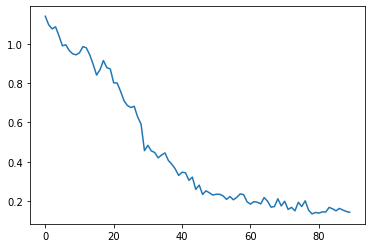

In [247]:
# Training
phys_params = [0]
thetas_opt, loss, accepted = optimize(phys_params, max_iter=90, L=5, meas_fitter=meas_fitter) #, pick_optimizer="adam")
plt.plot(loss)

In [210]:
np.savez(filename + "run1_thetas_opt_sim", thetas_opt=thetas_opt, loss=loss, accepted=accepted)

In [211]:
# Inference; note that on the real device each inference points takes about ~30 seconds
cost = np.zeros((len(gx_vals)))
thetas_opt = np.load(filename + "run1_thetas_opt_sim.npz",allow_pickle=True)["thetas_opt"]
shots = 1000
for i,p in enumerate(list(gx_list)):
    t0 = datetime.datetime.now()
    cost[i] = cost_function_single(thetas_opt, L, num_trash, i, shots=shots, meas_fitter=meas_fitter) # np.random.uniform(0, 2*np.pi, 2*L+2) random parameters to check if training "does" something - result was: with random paremters just get noise, so yes, it "does" something
    print(f"{i} / {len(gx_list)} - execution time {datetime.datetime.now()-t0}")

0 / 10 - execution time 0:00:00.273602
1 / 10 - execution time 0:00:00.322127
2 / 10 - execution time 0:00:00.225289
3 / 10 - execution time 0:00:00.205488
4 / 10 - execution time 0:00:00.233527
5 / 10 - execution time 0:00:00.197942
6 / 10 - execution time 0:00:00.232250
7 / 10 - execution time 0:00:00.281194
8 / 10 - execution time 0:00:00.230465
9 / 10 - execution time 0:00:00.220285


In [212]:
np.savez(filename + "run1_sim",cost=cost, thetas_opt=thetas_opt, loss=loss, accepted = accepted)

In [ ]:
# Training
phys_params = [0]
thetas_opt, loss, accepted = optimize(phys_params, max_iter=90, L=5, meas_fitter=meas_fitter) #, pick_optimizer="adam")
plt.plot(loss)

Initial cost: 1.135


In [248]:
np.savez(filename + "run1_thetas_opt_sim2", thetas_opt=thetas_opt, loss=loss, accepted=accepted)

In [249]:
# Inference; note that on the real device each inference points takes about ~30 seconds
cost = np.zeros((len(gx_vals)))
thetas_opt = np.load(filename + "run1_thetas_opt_sim2.npz",allow_pickle=True)["thetas_opt"]
shots = 1000
for i,p in enumerate(list(gx_list)):
    t0 = datetime.datetime.now()
    cost[i] = cost_function_single(thetas_opt, L, num_trash, i, shots=shots, meas_fitter=meas_fitter) # np.random.uniform(0, 2*np.pi, 2*L+2) random parameters to check if training "does" something - result was: with random paremters just get noise, so yes, it "does" something
    print(f"{i} / {len(gx_list)} - execution time {datetime.datetime.now()-t0}")

0 / 10 - execution time 0:00:00.200277
1 / 10 - execution time 0:00:00.169698
2 / 10 - execution time 0:00:00.174941
3 / 10 - execution time 0:00:00.172135
4 / 10 - execution time 0:00:00.181832
5 / 10 - execution time 0:00:00.171923
6 / 10 - execution time 0:00:00.203015
7 / 10 - execution time 0:00:00.184466
8 / 10 - execution time 0:00:00.170762
9 / 10 - execution time 0:00:00.182315


In [250]:
np.savez(filename + "run1_sim2",cost=cost, thetas_opt=thetas_opt, loss=loss, accepted = accepted)

/home/kkottmann/anaconda3/envs/qiskit_env/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


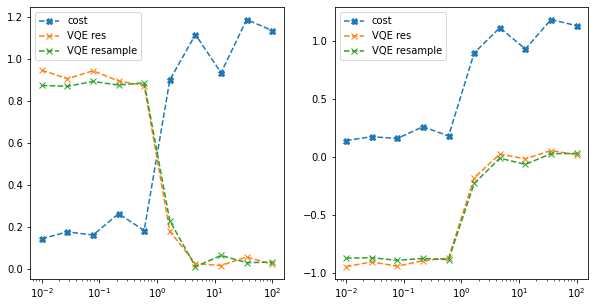

In [251]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
temp0 = np.load(filename + "run1_sim2.npz",allow_pickle=True)
cost = temp0["cost"] ; 
ax = axs[0]
ax.plot(gx_list, cost,"X--", label="cost")
ax.plot(gx_list, np.abs(Qmag_sim),"x--", label="VQE res")
ax.plot(gx_list, np.abs(Qmag_executed),"x--", label="VQE resample")
ax.set_xscale("log")
ax.legend()

ax = axs[1]
ax.plot(gx_list, cost,"X--", label="cost")
ax.plot(gx_list, Qmag_sim,"x--", label="VQE res")
ax.plot(gx_list, Qmag_executed,"x--", label="VQE resample")
ax.set_xscale("log")
ax.legend()

## Run 2

Initial cost: 0.701
Time: 25.09692 sec
(array([1.30030509, 1.53882154, 0.76009956, 4.41433285, 1.95498178,
       2.84114807, 5.24310541, 3.88312953, 6.45544483, 6.18265743,
       4.24978705, 0.05802965]), 0.12291092538200456, 121)


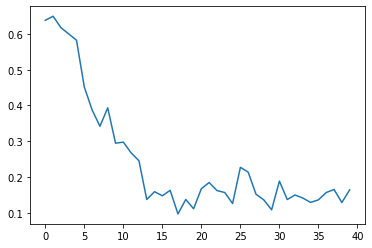

In [238]:
# Training
phys_params = [-1]
thetas_opt, loss, accepted = optimize(phys_params, max_iter=40, L=5, meas_fitter=meas_fitter) #, pick_optimizer="adam")
plt.plot(loss)

In [239]:
np.savez(filename + "run2_thetas_opt_sim2", thetas_opt=thetas_opt, loss=loss, accepted=accepted)

In [240]:
# Inference; note that on the real device each inference points takes about ~30 seconds
cost = np.zeros((len(gx_vals)))
thetas_opt = np.load(filename + "run2_thetas_opt_sim2.npz",allow_pickle=True)["thetas_opt"]
shots = 1000
for i,p in enumerate(list(gx_list)):
    t0 = datetime.datetime.now()
    cost[i] = cost_function_single(thetas_opt, L, num_trash, i, shots=shots, meas_fitter=meas_fitter) # np.random.uniform(0, 2*np.pi, 2*L+2) random parameters to check if training "does" something - result was: with random paremters just get noise, so yes, it "does" something
    print(f"{i} / {len(gx_list)} - execution time {datetime.datetime.now()-t0}")

0 / 10 - execution time 0:00:00.183928
1 / 10 - execution time 0:00:00.164266
2 / 10 - execution time 0:00:00.167428
3 / 10 - execution time 0:00:00.163017
4 / 10 - execution time 0:00:00.164502
5 / 10 - execution time 0:00:00.165067
6 / 10 - execution time 0:00:00.172845
7 / 10 - execution time 0:00:00.161159
8 / 10 - execution time 0:00:00.166633
9 / 10 - execution time 0:00:00.182539


In [241]:
np.savez(filename + "run2_sim2",cost=cost, thetas_opt=thetas_opt, loss=loss, accepted = accepted)

/home/kkottmann/anaconda3/envs/qiskit_env/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


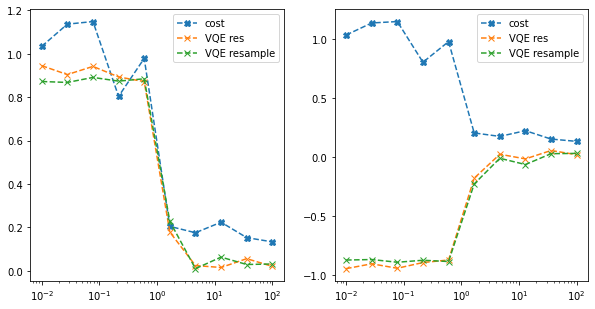

In [242]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
temp0 = np.load(filename + "run2_sim2.npz",allow_pickle=True)
cost = temp0["cost"] ; 
ax = axs[0]
ax.plot(gx_list, cost,"X--", label="cost")
ax.plot(gx_list, np.abs(Qmag_sim),"x--", label="VQE res")
ax.plot(gx_list, np.abs(Qmag_executed),"x--", label="VQE resample")
ax.set_xscale("log")
ax.legend()

ax = axs[1]
ax.plot(gx_list, cost,"X--", label="cost")
ax.plot(gx_list, Qmag_sim,"x--", label="VQE res")
ax.plot(gx_list, Qmag_executed,"x--", label="VQE resample")
ax.set_xscale("log")
ax.legend()

# Real device

In [252]:
backend = backend_device

## Error mitigation

In [253]:
meas_fitter = calibrate_circuit(L, nums_trash=trash_qubits_idxs)

mcal_2021-06-10 03:45:56.788625 [[0.963 0.057 0.051 0.004]
 [0.007 0.921 0.001 0.047]
 [0.03  0.    0.944 0.044]
 [0.    0.022 0.004 0.905]]


## Run 1

Initial cost: 0.778
Time: 4045.60398 sec
(array([ 6.14770707,  0.23836948,  3.00261112,  5.62123945,  1.04824386,
        0.45302894,  5.88504287,  5.91592708,  3.83336787,  5.47132939,
       -0.22580996,  2.79784763]), 0.576074642773089, 46)


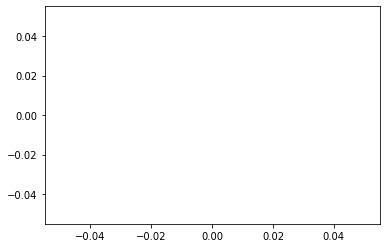

In [216]:
# Training
phys_params = [0]
thetas_guess = np.load(filename + "run1_thetas_opt_sim.npz",allow_pickle=True)["thetas_opt"]
thetas_opt, loss, accepted = optimize(phys_params, thetas= thetas_guess, callback=False, max_iter=15, L=5, meas_fitter=meas_fitter) #, pick_optimizer="adam")
plt.plot(loss)

In [217]:
np.savez(filename + "run1_thetas_opt_device", thetas_opt=thetas_opt, loss=loss, accepted=accepted)

In [218]:
# Inference; note that on the real device each inference points takes about ~30 seconds
cost = np.zeros((len(gx_vals)))
thetas_opt = np.load(filename + "run1_thetas_opt_device.npz",allow_pickle=True)["thetas_opt"]
shots = 1000
for i,p in enumerate(list(gx_list)):
    t0 = datetime.datetime.now()
    cost[i] = cost_function_single(thetas_opt, L, num_trash, i, shots=shots, meas_fitter=meas_fitter) # np.random.uniform(0, 2*np.pi, 2*L+2) random parameters to check if training "does" something - result was: with random paremters just get noise, so yes, it "does" something
    print(f"{i} / {len(gx_list)} - execution time {datetime.datetime.now()-t0}")

0 / 10 - execution time 0:00:48.463682
1 / 10 - execution time 0:00:56.837535
2 / 10 - execution time 0:00:51.373971
3 / 10 - execution time 0:00:49.146163
4 / 10 - execution time 0:00:48.562458
5 / 10 - execution time 0:00:46.065514
6 / 10 - execution time 0:00:49.043284
7 / 10 - execution time 0:00:52.622607
8 / 10 - execution time 0:00:44.051426
9 / 10 - execution time 0:00:43.651384


In [219]:
np.savez(filename + "run1_device",cost=cost, thetas_opt=thetas_opt, loss=loss, accepted = accepted)

/home/kkottmann/anaconda3/envs/qiskit_env/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


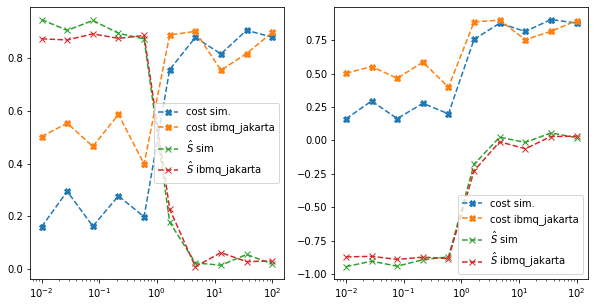

In [244]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
cost_device = np.load(filename + "run1_device.npz",allow_pickle=True)["cost"]
cost_sim = np.load(filename + "run1_sim.npz",allow_pickle=True)["cost"]
ax = axs[0]
ax.plot(gx_list, cost_sim,"X--", label="cost sim.")
ax.plot(gx_list, cost_device,"X--", label="cost ibmq_jakarta")
ax.plot(gx_list, np.abs(Qmag_sim),"x--", label="$\hat{S}$ sim")
ax.plot(gx_list, np.abs(Qmag_executed),"x--", label="$\hat{S}$ ibmq_jakarta")
ax.set_xscale("log")
ax.legend()

ax = axs[1]
ax.plot(gx_list, cost_sim,"X--", label="cost sim.")
ax.plot(gx_list, cost_device,"X--", label="cost ibmq_jakarta")
ax.plot(gx_list, Qmag_sim,"x--", label="$\hat{S}$ sim")
ax.plot(gx_list, Qmag_executed,"x--", label="$\hat{S}$ ibmq_jakarta")
ax.set_xscale("log")
ax.legend()

running it a second time

Initial cost: 0.444
Time: 5094.66400 sec
(array([ 3.79650272,  3.28199734,  1.50419534,  2.84132815,  0.9808093 ,
        5.41583733,  6.47107423,  1.0831527 ,  3.12242234,  0.85419766,
        3.20858982, -0.10906498]), 0.28001882957910995, 76)


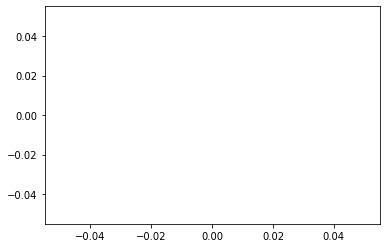

In [254]:
# Training
phys_params = [0]
thetas_guess = np.load(filename + "run1_thetas_opt_sim2.npz",allow_pickle=True)["thetas_opt"]
thetas_opt, loss, accepted = optimize(phys_params, thetas= thetas_guess, callback=False, max_iter=25, L=5, meas_fitter=meas_fitter) #, pick_optimizer="adam")
plt.plot(loss)

In [255]:
np.savez(filename + "run1_thetas_opt_device2", thetas_opt=thetas_opt, loss=loss, accepted=accepted)

In [256]:
# Inference; note that on the real device each inference points takes about ~30 seconds
cost = np.zeros((len(gx_vals)))
thetas_opt = np.load(filename + "run1_thetas_opt_device2.npz",allow_pickle=True)["thetas_opt"]
shots = 1000
for i,p in enumerate(list(gx_list)):
    t0 = datetime.datetime.now()
    cost[i] = cost_function_single(thetas_opt, L, num_trash, i, shots=shots, meas_fitter=meas_fitter) # np.random.uniform(0, 2*np.pi, 2*L+2) random parameters to check if training "does" something - result was: with random paremters just get noise, so yes, it "does" something
    print(f"{i} / {len(gx_list)} - execution time {datetime.datetime.now()-t0}")

0 / 10 - execution time 0:00:44.786102
1 / 10 - execution time 0:00:47.065045
2 / 10 - execution time 0:00:45.896712
3 / 10 - execution time 0:00:45.187521
4 / 10 - execution time 0:00:48.611465
5 / 10 - execution time 0:00:48.715626
6 / 10 - execution time 0:00:56.764724
7 / 10 - execution time 0:00:55.436698
8 / 10 - execution time 0:00:47.045969
9 / 10 - execution time 0:00:49.769821


In [257]:
np.savez(filename + "run1_device2",cost=cost, thetas_opt=thetas_opt, loss=loss, accepted = accepted)

In [259]:
filename

'data/jakarta_execute'

/home/kkottmann/anaconda3/envs/qiskit_env/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


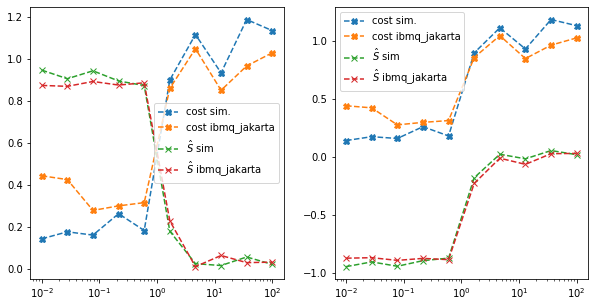

In [258]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
cost_device = np.load(filename + "run1_device2.npz",allow_pickle=True)["cost"]
cost_sim = np.load(filename + "run1_sim2.npz",allow_pickle=True)["cost"]
ax = axs[0]
ax.plot(gx_list, cost_sim,"X--", label="cost sim.")
ax.plot(gx_list, cost_device,"X--", label="cost ibmq_jakarta")
ax.plot(gx_list, np.abs(Qmag_sim),"x--", label="$\hat{S}$ sim")
ax.plot(gx_list, np.abs(Qmag_executed),"x--", label="$\hat{S}$ ibmq_jakarta")
ax.set_xscale("log")
ax.legend()

ax = axs[1]
ax.plot(gx_list, cost_sim,"X--", label="cost sim.")
ax.plot(gx_list, cost_device,"X--", label="cost ibmq_jakarta")
ax.plot(gx_list, Qmag_sim,"x--", label="$\hat{S}$ sim")
ax.plot(gx_list, Qmag_executed,"x--", label="$\hat{S}$ ibmq_jakarta")
ax.set_xscale("log")
ax.legend()

# Run 2

In [182]:
meas_fitter = calibrate_circuit(L, nums_trash=trash_qubits_idxs)

mcal_2021-06-09 16:41:31.169130 [[0.957 0.036 0.028 0.002]
 [0.026 0.946 0.001 0.047]
 [0.017 0.    0.946 0.041]
 [0.    0.018 0.025 0.91 ]]


In [184]:
# Inference; note that on the real device each inference points takes about ~30 seconds
cost = np.zeros((len(gx_vals)))
thetas_opt = np.load(filename + "run2_thetas_opt_sim.npz",allow_pickle=True)["thetas_opt"]
shots = 1000
for i,p in enumerate(list(gx_list)):
    t0 = datetime.datetime.now()
    cost[i] = cost_function_single(thetas_opt, L, num_trash, i, shots=shots, meas_fitter=meas_fitter) # np.random.uniform(0, 2*np.pi, 2*L+2) random parameters to check if training "does" something - result was: with random paremters just get noise, so yes, it "does" something
    print(f"{i} / {len(gx_list)} - execution time {datetime.datetime.now()-t0}")

0 / 10 - execution time 0:30:37.458676
1 / 10 - execution time 0:01:07.761847
2 / 10 - execution time 0:00:47.068112
3 / 10 - execution time 0:00:45.163469
4 / 10 - execution time 0:00:44.681068
5 / 10 - execution time 0:01:43.606945
6 / 10 - execution time 0:00:59.365646
7 / 10 - execution time 0:00:43.239815
8 / 10 - execution time 0:00:49.882856
9 / 10 - execution time 0:00:46.838198


In [221]:
filename

'data/jakarta_execute'

In [185]:
np.savez(filename + "run2_device",cost=cost, thetas_opt=thetas_opt, loss=loss, accepted = accepted)

/home/kkottmann/anaconda3/envs/qiskit_env/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


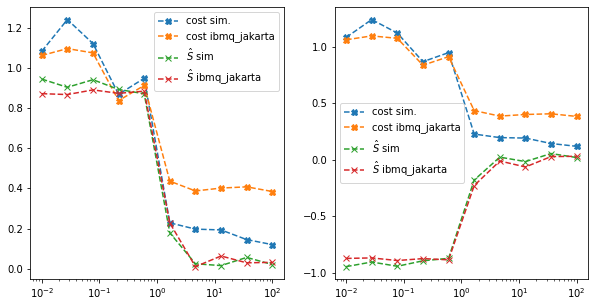

In [186]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
cost_device = np.load(filename + "run2_device.npz",allow_pickle=True)["cost"]
cost_sim = np.load(filename + "run2_sim.npz",allow_pickle=True)["cost"]
ax = axs[0]
ax.plot(gx_list, cost_sim,"X--", label="cost sim.")
ax.plot(gx_list, cost_device,"X--", label="cost ibmq_jakarta")
ax.plot(gx_list, np.abs(Qmag_sim),"x--", label="$\hat{S}$ sim")
ax.plot(gx_list, np.abs(Qmag_executed),"x--", label="$\hat{S}$ ibmq_jakarta")
ax.set_xscale("log")
ax.legend()

ax = axs[1]
ax.plot(gx_list, cost_sim,"X--", label="cost sim.")
ax.plot(gx_list, cost_device,"X--", label="cost ibmq_jakarta")
ax.plot(gx_list, Qmag_sim,"x--", label="$\hat{S}$ sim")
ax.plot(gx_list, Qmag_executed,"x--", label="$\hat{S}$ ibmq_jakarta")
ax.set_xscale("log")
ax.legend()

## full execute in fairshare over night

In [230]:
meas_fitter = calibrate_circuit(L, nums_trash=trash_qubits_idxs)

mcal_2021-06-09 23:57:03.558521 [[0.98  0.035 0.055 0.003]
 [0.007 0.962 0.    0.066]
 [0.013 0.    0.936 0.034]
 [0.    0.003 0.009 0.897]]


Initial cost: 0.481
Time: 5458.34272 sec
(array([6.51729955, 4.81613789, 3.65640407, 1.23682433, 1.75303284,
       3.51598872, 0.43736286, 2.21319091, 0.06593433, 1.74090984,
       5.4182227 , 3.2849813 ]), 0.6554996071162504, 76)


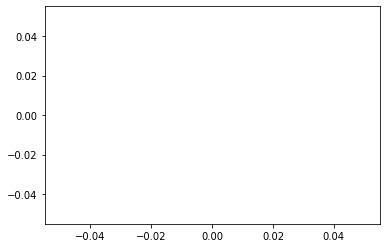

In [231]:
# Training
phys_params = [-1]
thetas_guess = np.load(filename + "run2_thetas_opt_sim.npz",allow_pickle=True)["thetas_opt"]
thetas_opt, loss, accepted = optimize(phys_params, thetas= thetas_guess, callback=False, max_iter=25, L=5, meas_fitter=meas_fitter) #, pick_optimizer="adam")
plt.plot(loss)

In [232]:
np.savez(filename + "run2_thetas_opt_device_overnight", thetas_opt=thetas_opt, loss=loss, accepted=accepted)

In [233]:
# Inference; note that on the real device each inference points takes about ~30 seconds
cost = np.zeros((len(gx_vals)))
thetas_opt = np.load(filename + "run2_thetas_opt_device_overnight.npz",allow_pickle=True)["thetas_opt"]
shots = 1000
for i,p in enumerate(list(gx_list)):
    t0 = datetime.datetime.now()
    cost[i] = cost_function_single(thetas_opt, L, num_trash, i, shots=shots, meas_fitter=meas_fitter) # np.random.uniform(0, 2*np.pi, 2*L+2) random parameters to check if training "does" something - result was: with random paremters just get noise, so yes, it "does" something
    print(f"{i} / {len(gx_list)} - execution time {datetime.datetime.now()-t0}")

0 / 10 - execution time 0:00:45.410855
1 / 10 - execution time 0:01:58.149185
2 / 10 - execution time 0:00:54.678073
3 / 10 - execution time 0:00:52.388528
4 / 10 - execution time 0:00:44.841537
5 / 10 - execution time 0:00:48.502856
6 / 10 - execution time 0:00:46.378837
7 / 10 - execution time 0:00:48.862728
8 / 10 - execution time 0:00:51.248503
9 / 10 - execution time 0:00:47.053783


In [234]:
np.savez(filename + "run2_device_overnight",cost=cost, thetas_opt=thetas_opt, loss=loss, accepted = accepted)

/home/kkottmann/anaconda3/envs/qiskit_env/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


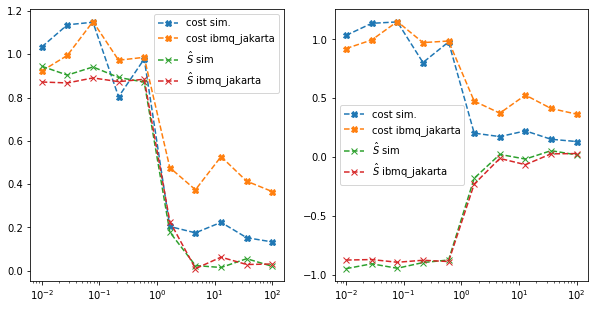

In [243]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
cost_device = np.load(filename + "run2_device_overnight.npz",allow_pickle=True)["cost"]
cost_sim = np.load(filename + "run2_sim2.npz",allow_pickle=True)["cost"]
ax = axs[0]
ax.plot(gx_list, cost_sim,"X--", label="cost sim.")
ax.plot(gx_list, cost_device,"X--", label="cost ibmq_jakarta")
ax.plot(gx_list, np.abs(Qmag_sim),"x--", label="$\hat{S}$ sim")
ax.plot(gx_list, np.abs(Qmag_executed),"x--", label="$\hat{S}$ ibmq_jakarta")
ax.set_xscale("log")
ax.legend()

ax = axs[1]
ax.plot(gx_list, cost_sim,"X--", label="cost sim.")
ax.plot(gx_list, cost_device,"X--", label="cost ibmq_jakarta")
ax.plot(gx_list, Qmag_sim,"x--", label="$\hat{S}$ sim")
ax.plot(gx_list, Qmag_executed,"x--", label="$\hat{S}$ ibmq_jakarta")
ax.set_xscale("log")
ax.legend()